# Part 2 : Comparing scenarios and mesure sensitivity to global warming

## A. Data sources and information about CMIP6

In [ ]:
# first we have to install some libraries in Colab
!pip install zarr
!pip install gcsfs
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely don't work well together at the moment
!pip install shapely --no-binary shapely; # so reinstall a version that will work

Found existing installation: Shapely 1.6.4
Uninstalling Shapely-1.6.4:
  Successfully uninstalled Shapely-1.6.4
     |████████████████████████████████| 278 kB 4.2 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install cartopy==0.18 

In [ ]:
# set up our libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

!pip install seawater
import seawater as sw

# set up cartopy
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

# notebook display options
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1 / Sea Ice Surface Area : Plotting different SSPs

In [ ]:
# and load in the SSH data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'zos' & experiment_id == 'ssp585'")
df_siarean = df.query("activity_id=='ScenarioMIP' & table_id == 'SImon' & variable_id == 'siarean' ")



df_siarean

activity_id institution_id  ... dcpp_init_year   version
45143   ScenarioMIP            AWI  ...            NaN  20181218
45157   ScenarioMIP            AWI  ...            NaN  20181218
45173   ScenarioMIP            AWI  ...            NaN  20181218
45259   ScenarioMIP            AWI  ...            NaN  20181218
45276   ScenarioMIP            AWI  ...            NaN  20181218
...             ...            ...  ...            ...       ...
415372  ScenarioMIP           NCAR  ...            NaN  20200206
415462  ScenarioMIP           NCAR  ...            NaN  20200206
417745  ScenarioMIP           IPSL  ...            NaN  20200218
418278  ScenarioMIP           IPSL  ...            NaN  20200218
419558  ScenarioMIP           NCAR  ...            NaN  20200224

[155 rows x 11 columns]

In [ ]:
df_ncar = df_siarean.query('source_id == "IPSL-CM6A-LR"')
df_ncar
# MPI-ESM1-2-HR

activity_id institution_id  ... dcpp_init_year   version
47331   ScenarioMIP           IPSL  ...            NaN  20190119
48424   ScenarioMIP           IPSL  ...            NaN  20190119
48482   ScenarioMIP           IPSL  ...            NaN  20190119
48690   ScenarioMIP           IPSL  ...            NaN  20190119
49012   ScenarioMIP           IPSL  ...            NaN  20190119
49042   ScenarioMIP           IPSL  ...            NaN  20190119
49215   ScenarioMIP           IPSL  ...            NaN  20190119
49418   ScenarioMIP           IPSL  ...            NaN  20190119
49517   ScenarioMIP           IPSL  ...            NaN  20190119
50046   ScenarioMIP           IPSL  ...            NaN  20190119
50201   ScenarioMIP           IPSL  ...            NaN  20190119
71906   ScenarioMIP           IPSL  ...            NaN  20190410
73071   ScenarioMIP           IPSL  ...            NaN  20190410
74789   ScenarioMIP           IPSL  ...            NaN  20190410
201225  ScenarioMIP           IPSL  ...            NaN  20190516
278963  ScenarioMIP           IPSL  ...            NaN  20190903
279971  ScenarioMIP           IPSL  ...            NaN  20190903
297200  ScenarioMIP           IPSL  ...            NaN  20191003
297659  ScenarioMIP           IPSL  ...            NaN  20191003
297736  ScenarioMIP           IPSL  ...            NaN  20191003
386675  ScenarioMIP           IPSL  ...            NaN  20191121
386869  ScenarioMIP           IPSL  ...            NaN  20191121
386892  ScenarioMIP           IPSL  ...            NaN  20191121
387032  ScenarioMIP           IPSL  ...            NaN  20191121
387526  ScenarioMIP           IPSL  ...            NaN  20191121
387682  ScenarioMIP           IPSL  ...            NaN  20191121
387712  ScenarioMIP           IPSL  ...            NaN  20191121
388243  ScenarioMIP           IPSL  ...            NaN  20191121
388562  ScenarioMIP           IPSL  ...            NaN  20191121
388596  ScenarioMIP           IPSL  ...            NaN  20191121
388713  ScenarioMIP           IPSL  ...            NaN  20191121
389847  ScenarioMIP           IPSL  ...            NaN  20191122
390297  ScenarioMIP           IPSL  ...            NaN  20191122
417745  ScenarioMIP           IPSL  ...            NaN  20200218
418278  ScenarioMIP           IPSL  ...            NaN  20200218

[35 rows x 11 columns]

In [ ]:
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ncar.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)
ds

#serie = ds.siarean
#serie = serie.sel(time=serie.time)
#serie.load() 
#date = pd.to_datetime(serie.time.data, unit="h")
#date

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1032, x: 1, y: 1)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(1, 1, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(1, 1, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * time            (time) int64 0 708 1416 2148 ... 750924 751656 752388 753120
    time_bounds     (time, axis_nbounds) float64 dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    siarean         (time, y, x) float32 dask.array<chunksize=(516, 1, 1), meta=np.ndarray>
Attributes: (12/53)
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp245
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    tracking_id:            hdl:21.14100/245bb269-d32a-4953-a296-e69b1f8f8a0f
    variable_id:            siarean
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r25i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/245bb269-d32a-4953-a296-e69b1f8f8a0f
    version_id:             v20200218

In [ ]:
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ncar.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)
ds

serie = ds.siarean

serie.time.data

date = pd.to_datetime(serie.time.data, unit="h", origin=pd.Timestamp(year=2015, month=1, day=1, hour=0))

date

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-30 12:00:00',
               '2015-03-01 00:00:00', '2015-03-31 12:00:00',
               '2015-05-01 00:00:00', '2015-05-31 12:00:00',
               '2015-07-01 00:00:00', '2015-08-01 00:00:00',
               '2015-08-31 12:00:00', '2015-10-01 00:00:00',
               ...
               '2100-03-01 00:00:00', '2100-03-31 12:00:00',
               '2100-05-01 00:00:00', '2100-05-31 12:00:00',
               '2100-07-01 00:00:00', '2100-08-01 00:00:00',
               '2100-08-31 12:00:00', '2100-10-01 00:00:00',
               '2100-10-31 12:00:00', '2100-12-01 00:00:00'],
              dtype='datetime64[ns]', length=1032, freq=None)

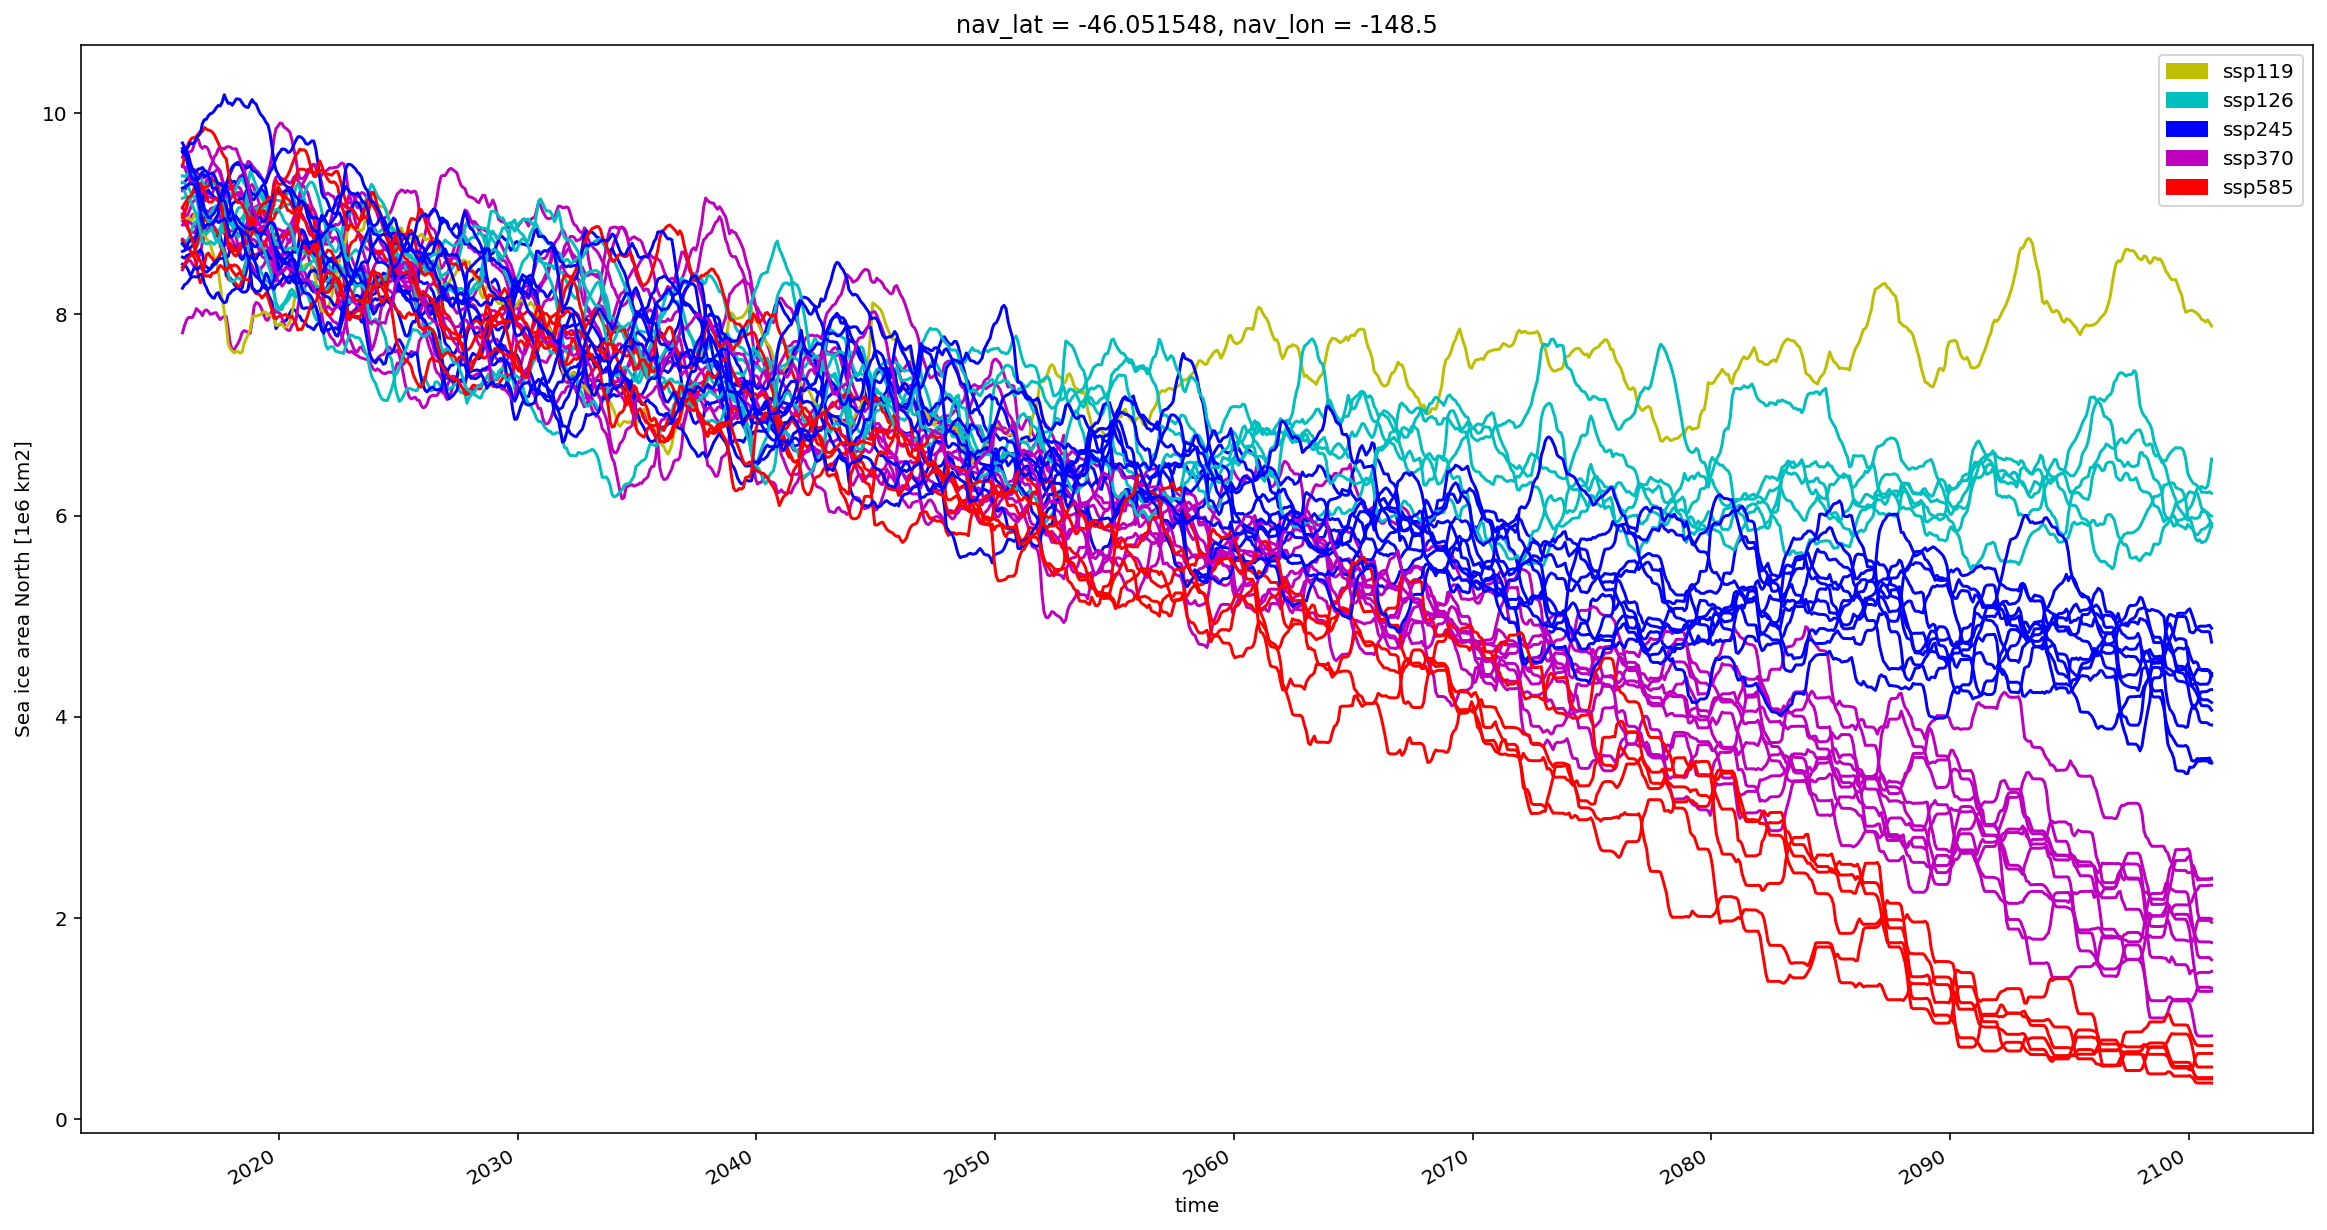

In [ ]:
plt.figure(figsize=(20,10))
import matplotlib.patches as mpatches
colors = {0: 'y', 1: 'c', 2: 'b',3:'m',4:'r'}
liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for i, row in df_ncar.iterrows():
    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True)
    index=liste.index(str(ds.experiment_id))
 
    c= colors[index]
    serie = ds.siarean
    serie.load() 
 
    serie.time.data
    date = pd.to_datetime(serie.time.data)
    date
    serie.coords["time"] = date
    serie.rolling(time=12).mean().plot( color=c )
    
# plt.legend(label='ssp126','ssp245','ssp370','ssp585')
# plt(label ='ssp126','ssp245','ssp370','ssp585')
    # label= str(ds.experiment_id)


pop_a = mpatches.Patch(color='y', label='ssp119')
pop_b = mpatches.Patch(color='c', label='ssp126')
pop_c = mpatches.Patch(color='b', label='ssp245')
pop_d = mpatches.Patch(color='m', label='ssp370')
pop_e = mpatches.Patch(color='r', label='ssp585')
plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

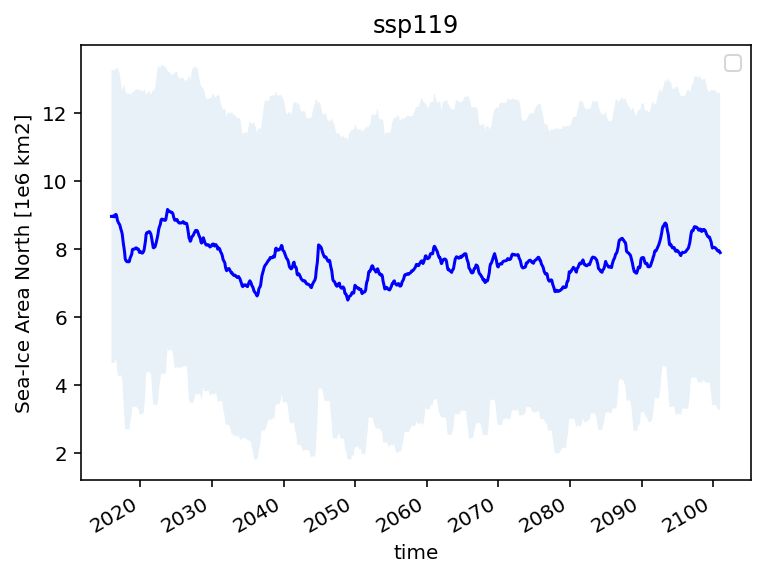

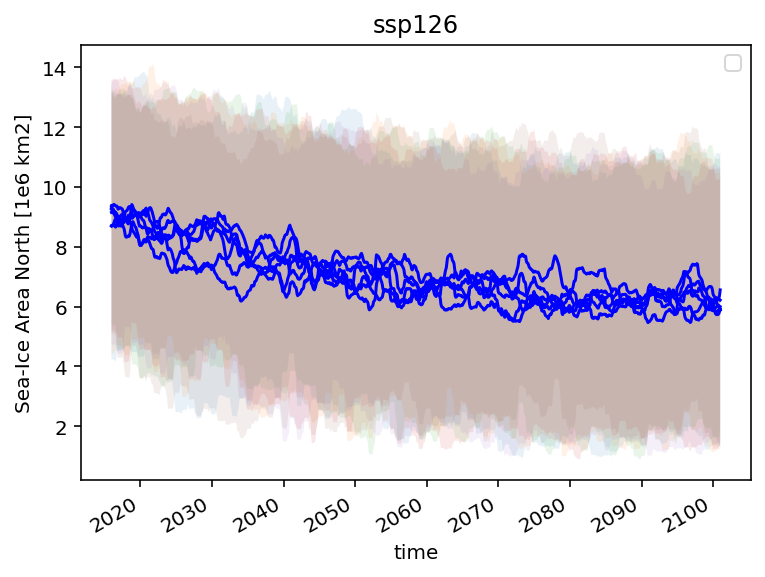

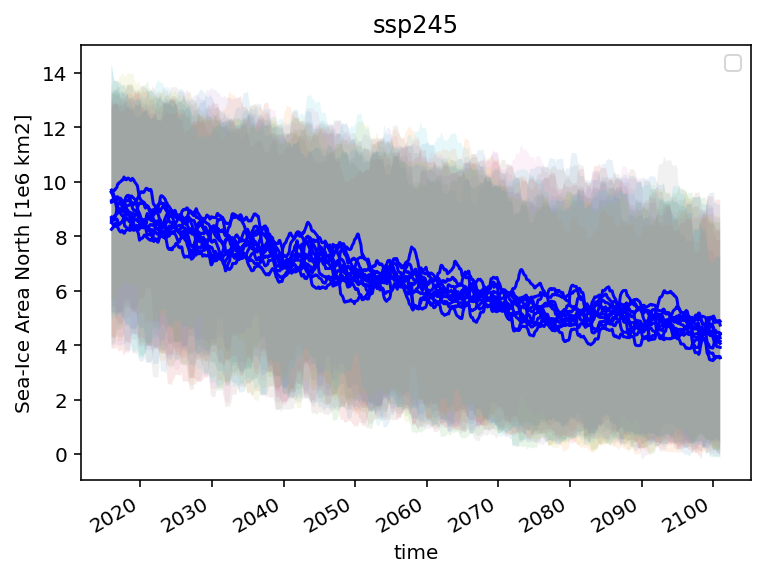

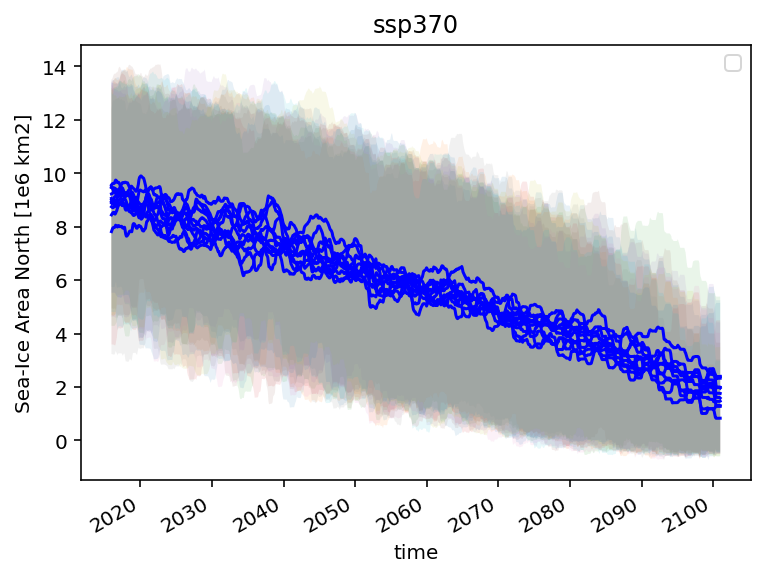

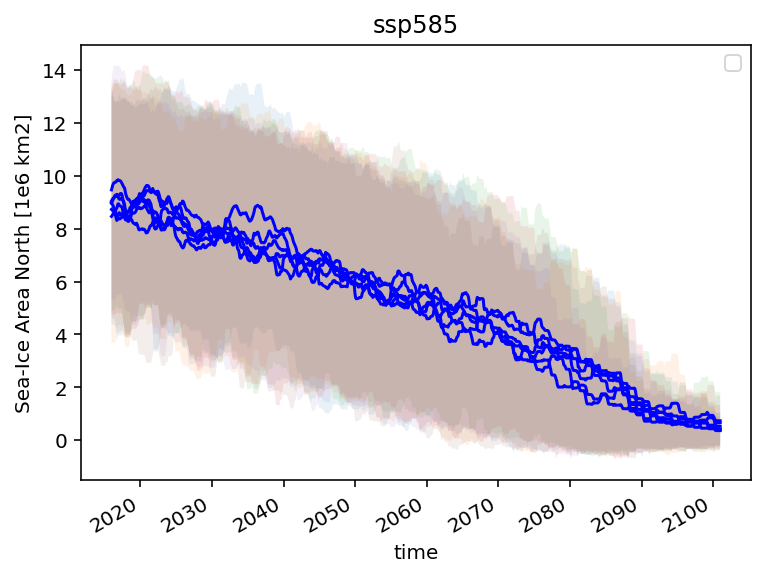

In [ ]:

liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for l in liste :
  plt.figure()
  for i, row in df_ncar.iterrows():

    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True) 
    serie = ds.siarean
    
    if ds.experiment_id==l : 
          
          serie.load() 
          date = pd.to_datetime(serie.time.data)
          serie.coords["time"] = date
          rolling=serie.rolling(time=12)
          data1=serie.rolling(time=12).mean()
          data2 = serie.rolling(time=12).mean() + serie.rolling(time=12).std()
          data3 = serie.rolling(time=12).mean() - serie.rolling(time=12).std()
          data1.plot(color='b')
          d2=data2.values.squeeze()
          d3=data3.values.squeeze()
          # data2.plot(color='c')
          # data3.plot(color='c')
          plt.fill_between(date,d2,d3,alpha=.1)
          plt.ylabel("Sea-Ice Area North [1e6 km2]")
          plt.title(l)
          plt.legend()










In [ ]:
df_Seav = df.query("activity_id=='ScenarioMIP' & table_id == 'SImon' & variable_id == 'sivoln' ")
df_ncar1 = df_Seav.query('source_id == "IPSL-CM6A-LR"')
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore1 = df_ncar1.zstore.values[-1]

# create a mapping interface to the store
mapper1 = gcs.get_mapper(zstore1)

# open it using xarray and zarr
ds1 = xr.open_zarr(mapper1, consolidated=True,decode_times=True)
ds1


<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1032, x: 1, y: 1)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(1, 1, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(1, 1, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * time            (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T...
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    sivoln          (time, y, x) float32 dask.array<chunksize=(516, 1, 1), meta=np.ndarray>
Attributes: (12/53)
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp585
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    tracking_id:            hdl:21.14100/40f07501-074e-4efa-906c-6cf513f10c21
    variable_id:            sivoln
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r4i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/40f07501-074e-4efa-906c-6cf513f10c21
    version_id:             v20191122

# 2 - Timeseries of Sea Ice Volume North : different SSPs

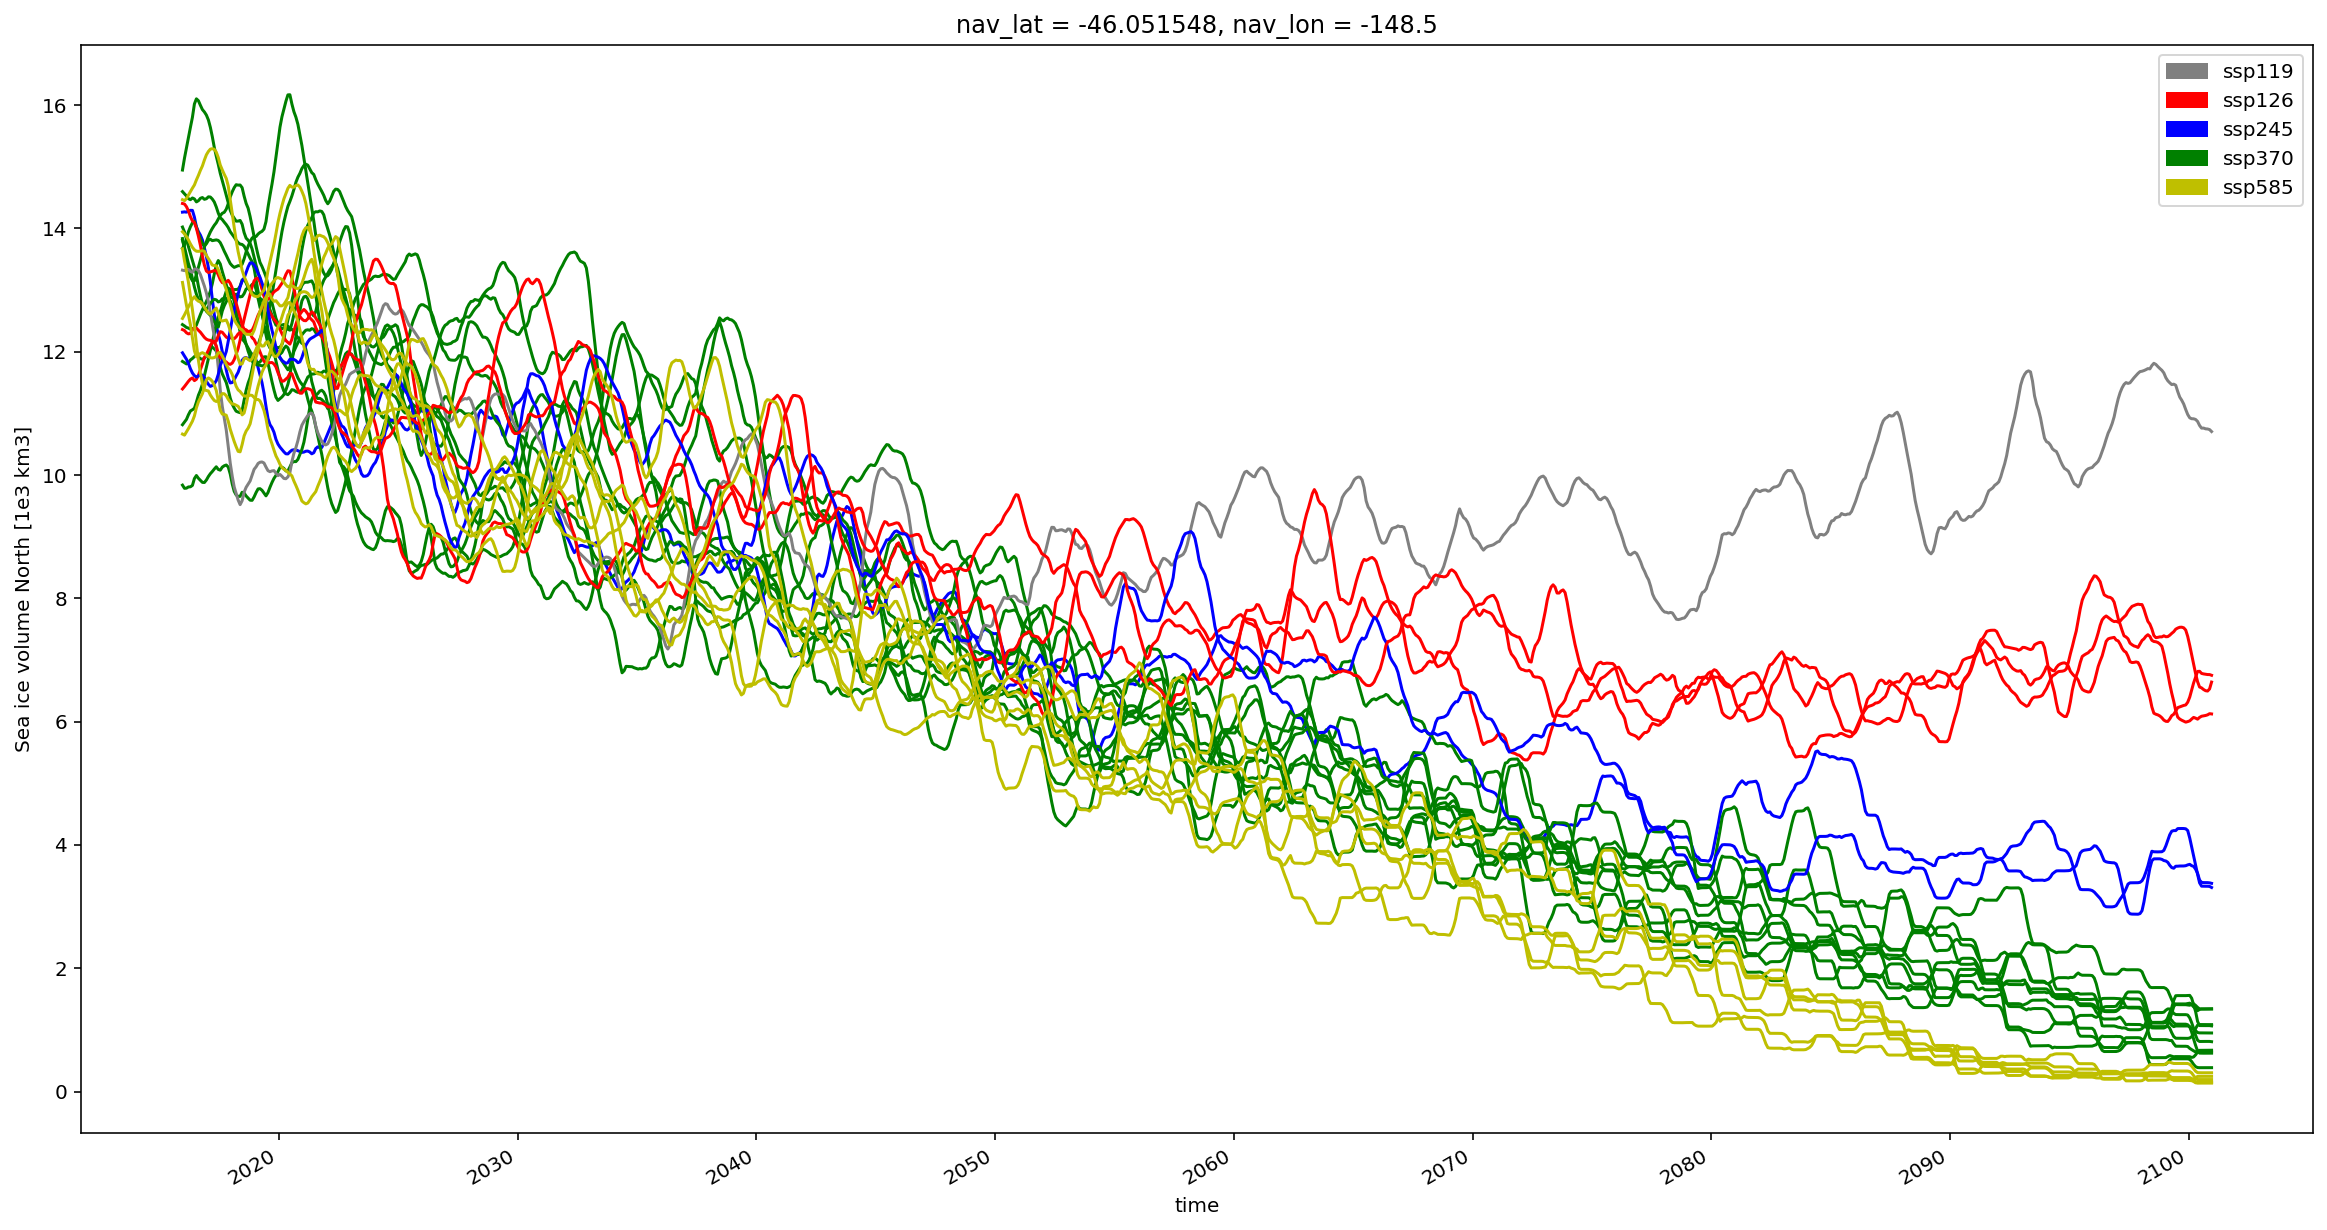

In [ ]:
plt.figure(figsize=(20,10))
import matplotlib.patches as mpatches
colors = {0: 'r', 1: 'b', 2: 'g',3:'y',4:'grey'}
liste= ['ssp126','ssp245','ssp370','ssp585','ssp119']
for i, row in df_ncar1.iterrows():
    mapper = gcs.get_mapper(row.zstore)
    ds1 = xr.open_zarr(mapper, consolidated=True,decode_times=True)
    index=liste.index(str(ds1.experiment_id))
    c= colors[index]
    serie = ds1.sivoln
    serie.load() 
  #  t = serie.time.data//365
  #  t2 = serie.time.data - t*365 
    serie.time.data
    date = pd.to_datetime(serie.time.data)
    date
    serie.coords["time"] = date
    serie.rolling(time=12).mean().plot( color=c )
    
# plt.legend(label='ssp126','ssp245','ssp370','ssp585')
# plt(label ='ssp126','ssp245','ssp370','ssp585')
    # label= str(ds.experiment_id)



pop_a = mpatches.Patch(color='r', label='ssp126')
pop_b = mpatches.Patch(color='b', label='ssp245')
pop_c = mpatches.Patch(color='g', label='ssp370')
pop_d = mpatches.Patch(color='y', label='ssp585')
pop_e = mpatches.Patch(color='grey', label='ssp119')
plt.legend(handles=[pop_e,pop_a,pop_b,pop_c,pop_d])





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

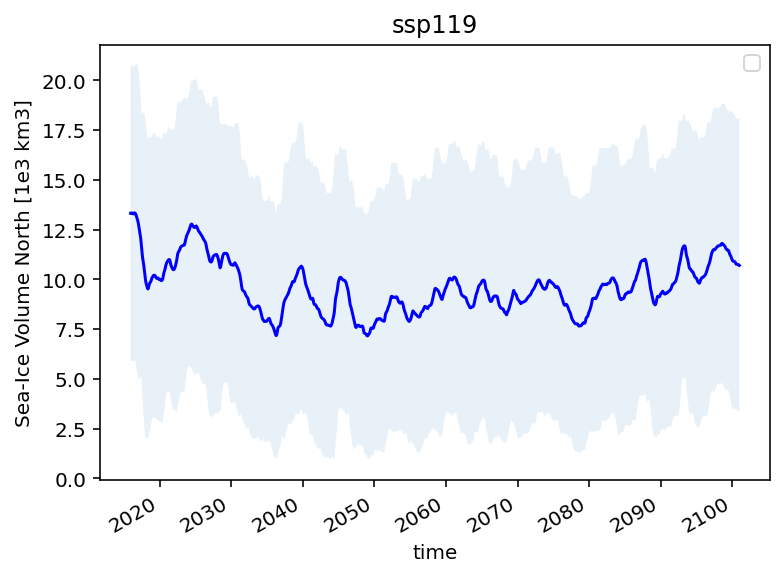

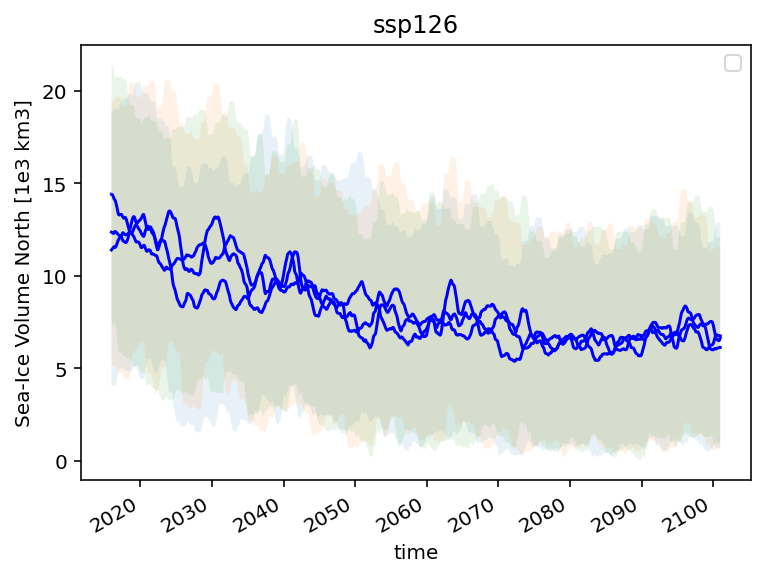

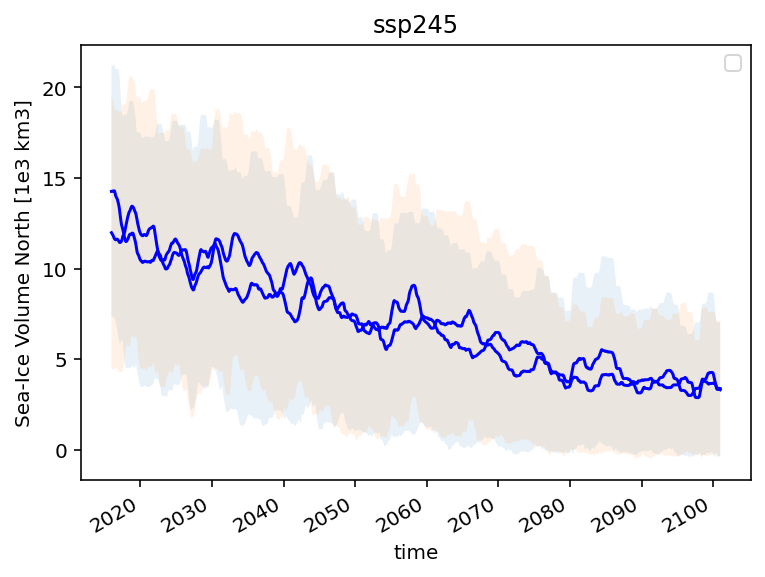

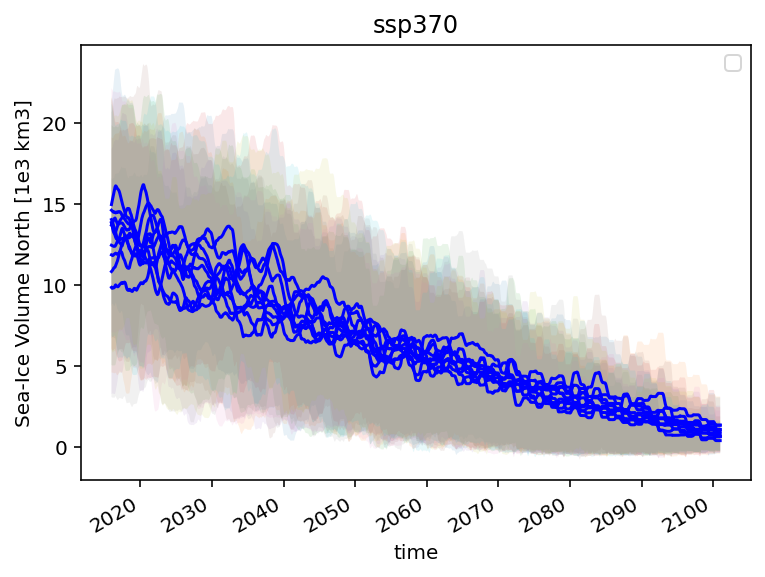

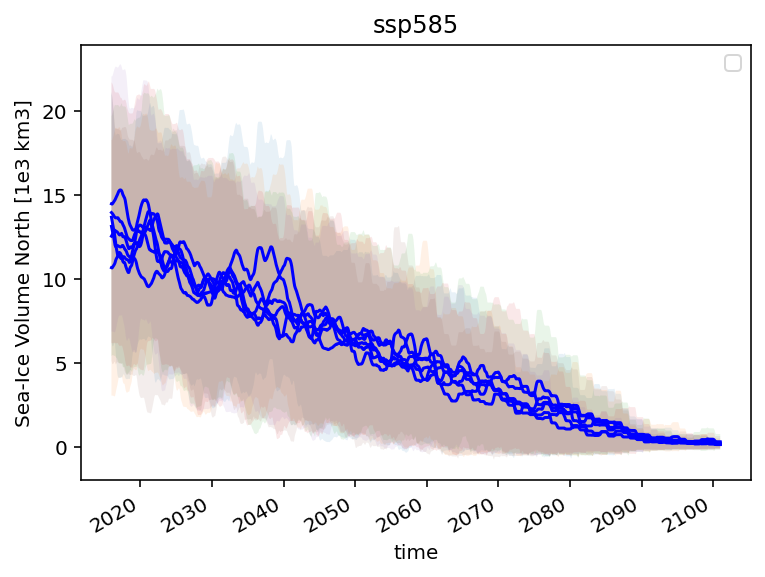

In [ ]:

liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for l in liste :
  plt.figure()
  for i, row in df_ncar1.iterrows():

    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True) 
    serie = ds.sivoln
    
    if ds.experiment_id==l : 
          
          serie.load() 
          date = pd.to_datetime(serie.time.data)
          serie.coords["time"] = date
          rolling=serie.rolling(time=12)
          data1=serie.rolling(time=12).mean()
          data2 = serie.rolling(time=12).mean() + serie.rolling(time=12).std()
          data3 = serie.rolling(time=12).mean() - serie.rolling(time=12).std()
          data1.plot(color='b')
          d2=data2.values.squeeze()
          d3=data3.values.squeeze()
          # data2.plot(color='c')
          # data3.plot(color='c')
          plt.fill_between(date,d2,d3,alpha=.1)
          plt.ylabel("Sea-Ice Volume North [1e3 km3]")
          plt.title(l)
          plt.legend()

# 3 / Mesure of Sensitivity to global warming : Pessimistic Scenario

In [ ]:
experiment_id = 'ssp585'
source_id = 'IPSL-CM6A-LR'
table_id = 'Amon'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}' and table_id == '{table_id}' ")

# what variables match this query?
df_sub.variable_id.unique()

array(['ps', 'prw', 'prsn', 'prc', 'pr', 'o3', 'huss', 'hus', 'hurs',
       'hur', 'hfss', 'psl', 'rlut', 'tauu', 'ts', 'zg', 'wap', 'vas',
       'va', 'uas', 'ua', 'tauv', 'rlus', 'clwvi', 'evspsbl', 'hfls',
       'rlds', 'sfcWind', 'rtmt', 'rsutcs', 'rsut', 'rsus', 'rsdt',
       'rsds', 'rlutcs', 'tasmin', 'tasmax', 'tas', 'ta', 'clw', 'clt',
       'clivi', 'cli', 'cl'], dtype=object)

In [ ]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
# Grab the first line as an example:
url = df.zstore.values[0]
xr.open_zarr(fs.get_mapper(url),consolidated=True)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 804)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1948-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(804, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    ps         (time, lat, lon) float32 dask.array<chunksize=(804, 192, 288), meta=np.ndarray>
Attributes: (12/47)
    CDI:                     Climate Data Interface version 1.8.0 (http://mpi...
    CDO:                     Climate Data Operators version 1.8.0 (http://mpi...
    Conventions:             CF-1.7 CMIP-6.0
    activity_id:             HighResMIP
    cmor_version:            3.2.3
    creation_date:           2017-07-02T15:45:01Z
    ...                      ...
    tracking_id:             hdl:21.14100/bcc2c7c0-0ea9-4041-bdeb-d61d325a2cbb
    variable_id:             ps
    variant_label:           r1i1p1f1
    status:                  2019-11-16;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/bcc2c7c0-0ea9-4041-bdeb-d61d325a2cbb
    version_id:              v20170706

In [ ]:
df_tas = df_sub.query(" variable_id == 'tas' ")

dset_dict = {}
for zstore in df_tas.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    #print(dict(ds.dims))
    dset_dict[name] = ds
        



ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.Amon.tas.gr.v20190903
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.Amon.tas.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r6i1p1f1.Amon.tas.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r14i1p1f1.Amon.tas.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r2i1p1f1.Amon.tas.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r4i1p1f1.Amon.tas.gr.v20191122


In [ ]:


# Note that you can use <TAB> after starting the dictionary name to see the choices
ds = dset_dict['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.Amon.tas.gr.v20191121']






4) area weighting factor for each gridpoint

In [ ]:
experiment_id = 'ssp585'
source_id = 'IPSL-CM6A-LR'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}'  ")
df_area = df_sub.query(" variable_id == 'areacella' ")

In [ ]:
dset_dict1 = {}
for zstore in df_area.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds_area = xr.open_zarr(fs.get_mapper(zstore),consolidated=True,)
    #print(dict(ds.dims))
    dset_dict1[name] = ds_area

ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.fx.areacella.gr.v20190119
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.fx.areacella.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r2i1p1f1.fx.areacella.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r6i1p1f1.fx.areacella.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r14i1p1f1.fx.areacella.gr.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r4i1p1f1.fx.areacella.gr.v20191122


In [ ]:
ds_area = dset_dict1['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.fx.areacella.gr.v20191121']


In [ ]:
ds

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, time: 1032)
Coordinates:
    height       float64 2.0
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    tas          (time, lat, lon) float32 246.0 246.0 246.0 ... 276.4 276.4
Attributes: (12/54)
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp585
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    tracking_id:            hdl:21.14100/c41950dd-26a4-4e6d-a34a-729e6cb8366f
    variable_id:            tas
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r3i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/c41950dd-26a4-4e6d-a34a-729e6cb8366f
    version_id:             v20191121

In [ ]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

<xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float32, chunksize=(1032,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00

In [ ]:
%time ta_timeseries.load()

CPU times: user 91.2 ms, sys: 27.8 ms, total: 119 ms
Wall time: 120 ms


<xarray.DataArray (time: 1032)>
array([285.3982 , 285.71927, 286.14032, ..., 292.87656, 291.66324,
       290.8475 ], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Global Surface Air Temperature Change')

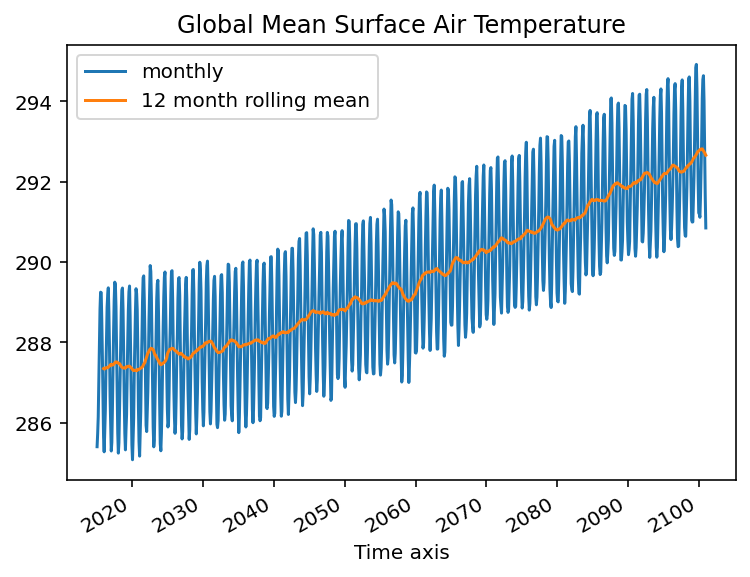

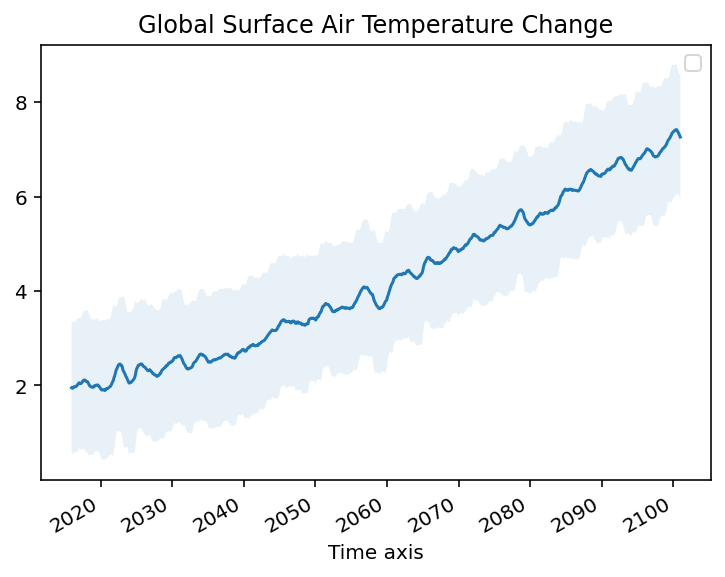

In [ ]:
plt.figure()
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')
plt.figure()
ta=ta_timeseries-ta_timeseries[0]

m=ta.rolling(time=12).mean()
m.plot()
s=ta.rolling(time=12).std()
date=ta_timeseries.time.squeeze()
plt.fill_between(date,m+s,m-s,alpha=0.1)
plt.legend()
plt.title('Global Surface Air Temperature Change')

 Siarean in function of global temperture

In [ ]:
experiment_id = 'ssp585'
source_id = 'IPSL-CM6A-LR'
table_id = 'SImon'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}' and table_id == '{table_id}' ")

# what variables match this query?
df_sub.variable_id.unique()

array(['sithick', 'sitemptop', 'sispeed', 'sisnthick', 'sisnmass',
       'simass', 'siextentn', 'siconc', 'sitimefrac', 'siu', 'siv',
       'siarean', 'sivol', 'sndmasssnf', 'sivols', 'sivoln', 'siareas'],
      dtype=object)

In [ ]:
df_siarean1 = df_sub.query(" variable_id == 'siarean' ")

dset_dict2 = {}
for zstore in df_siarean1.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds_siarean1 = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    #print(dict(ds.dims))
    dset_dict2[name] = ds_siarean1

ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.SImon.siarean.gn.v20190903
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.SImon.siarean.gn.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r2i1p1f1.SImon.siarean.gn.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r6i1p1f1.SImon.siarean.gn.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r14i1p1f1.SImon.siarean.gn.v20191121
ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r4i1p1f1.SImon.siarean.gn.v20191122


In [ ]:
# Note that you can use <TAB> after starting the dictionary name to see the choices
ds_siarean1 = dset_dict2['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.SImon.siarean.gn.v20191121']


In [ ]:
ta_timeseries[0]

<xarray.DataArray ()>
array(285.3982, dtype=float32)
Coordinates:
    height   float64 2.0
    time     datetime64[ns] 2015-01-16T12:00:00

No handles with labels found to put in legend.


Text(0, 0.5, 'Global Surface Air Temperature Change[K]')

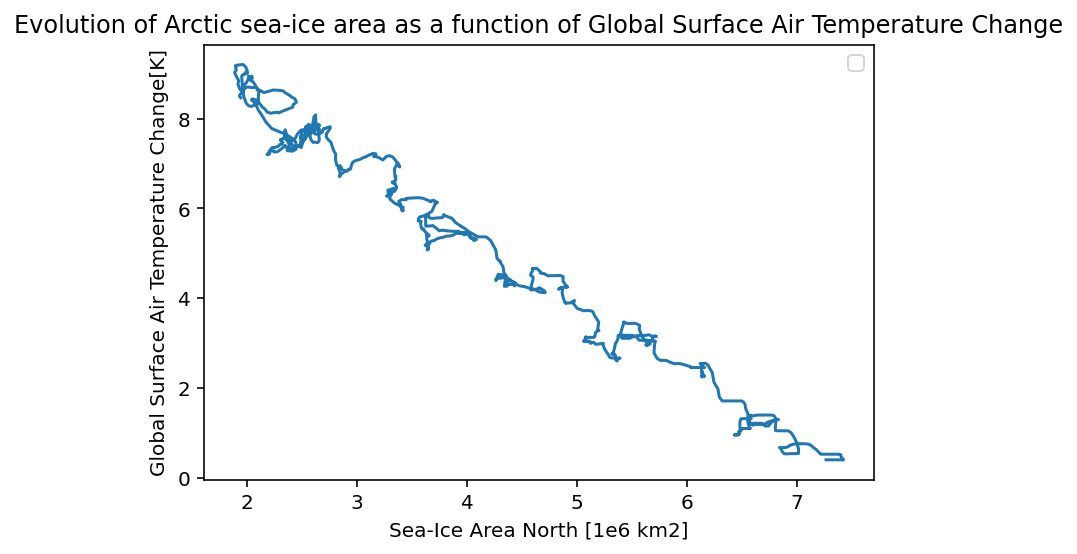

In [ ]:
y=ta_timeseries.rolling(time=12).mean()-ta_timeseries[0]
x=ds_siarean1.siarean.rolling(time=12).mean()
x1=[]
for j in x : 
  x1.append(j[0][0])
x1
plt.plot(y,x1)
plt.legend()
plt.title('Evolution of Arctic sea-ice area as a function of Global Surface Air Temperature Change')
plt.xlabel('Sea-Ice Area North [1e6 km2]')
plt.ylabel('Global Surface Air Temperature Change[K]')

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(y, x1)
plt.plot(y, regr.predict(y), color='blue', linewidth=3)


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(y, x1)
plt.plot(y, regr.predict(y), color='blue', linewidth=3)

AttributeError: ignored

# 4/ Sensitivity to global warming : Optimistic Scenario 

In [ ]:
# and load in the SSH data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'zos' & experiment_id == 'ssp585'")
df_siarean = df.query("activity_id=='ScenarioMIP' & table_id == 'SImon' & variable_id == 'siarean' ")



df_siarean

In [ ]:
df_ncar = df_siarean.query('source_id == "IPSL-CM6A-LR"')
df_ncar
# MPI-ESM1-2-HR

In [ ]:
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ncar.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)
ds

#serie = ds.siarean
#serie = serie.sel(time=serie.time)
#serie.load() 
#date = pd.to_datetime(serie.time.data, unit="h")
#date

In [ ]:
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ncar.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)
ds

serie = ds.siarean

serie.time.data

date = pd.to_datetime(serie.time.data, unit="h", origin=pd.Timestamp(year=2015, month=1, day=1, hour=0))

date

In [ ]:
plt.figure(figsize=(20,10))
import matplotlib.patches as mpatches
colors = {0: 'y', 1: 'c', 2: 'b',3:'m',4:'r'}
liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for i, row in df_ncar.iterrows():
    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True)
    index=liste.index(str(ds.experiment_id))
 
    c= colors[index]
    serie = ds.siarean
    serie.load() 
 
    serie.time.data
    date = pd.to_datetime(serie.time.data)
    date
    serie.coords["time"] = date
    serie.rolling(time=12).mean().plot( color=c )
    
# plt.legend(label='ssp126','ssp245','ssp370','ssp585')
# plt(label ='ssp126','ssp245','ssp370','ssp585')
    # label= str(ds.experiment_id)


pop_a = mpatches.Patch(color='y', label='ssp119')
pop_b = mpatches.Patch(color='c', label='ssp126')
pop_c = mpatches.Patch(color='b', label='ssp245')
pop_d = mpatches.Patch(color='m', label='ssp370')
pop_e = mpatches.Patch(color='r', label='ssp585')
plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e])

In [ ]:

liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for l in liste :
  plt.figure(figsize=(20,10))
  for i, row in df_ncar.iterrows():

    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True) 
    serie = ds.siarean
    
    if ds.experiment_id==l : 
          
          serie.load() 
          date = pd.to_datetime(serie.time.data)
          serie.coords["time"] = date
          rolling=serie.rolling(time=12)
          data1=serie.rolling(time=12).mean()
          data2 = serie.rolling(time=12).mean() + serie.rolling(time=12).std()
          data3 = serie.rolling(time=12).mean() - serie.rolling(time=12).std()
          data1.plot(color='b')
          d2=data2.values.squeeze()
          d3=data3.values.squeeze()
          data2.plot(color='c')
          data3.plot(color='c')
          plt.fill_between(date,d2,d3,alpha=.1)
          plt.ylabel("Sea-Ice Area North [1e6 km2]")
          plt.title(l)
          plt.legend()










In [ ]:
df_Seav = df.query("activity_id=='ScenarioMIP' & table_id == 'SImon' & variable_id == 'sivoln' ")
df_ncar1 = df_Seav.query('source_id == "IPSL-CM6A-LR"')
# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore1 = df_ncar1.zstore.values[-1]

# create a mapping interface to the store
mapper1 = gcs.get_mapper(zstore1)

# open it using xarray and zarr
ds1 = xr.open_zarr(mapper1, consolidated=True,decode_times=True)
ds1


In [ ]:
plt.figure(figsize=(20,10))
import matplotlib.patches as mpatches
colors = {0: 'r', 1: 'b', 2: 'g',3:'y',4:'grey'}
liste= ['ssp126','ssp245','ssp370','ssp585','ssp119']
for i, row in df_ncar1.iterrows():
    mapper = gcs.get_mapper(row.zstore)
    ds1 = xr.open_zarr(mapper, consolidated=True,decode_times=True)
    index=liste.index(str(ds1.experiment_id))
    c= colors[index]
    serie = ds1.sivoln
    serie.load() 
  #  t = serie.time.data//365
  #  t2 = serie.time.data - t*365 
    serie.time.data
    date = pd.to_datetime(serie.time.data)
    date
    serie.coords["time"] = date
    serie.rolling(time=12).mean().plot( color=c )
    
# plt.legend(label='ssp126','ssp245','ssp370','ssp585')
# plt(label ='ssp126','ssp245','ssp370','ssp585')
    # label= str(ds.experiment_id)



pop_a = mpatches.Patch(color='r', label='ssp126')
pop_b = mpatches.Patch(color='b', label='ssp245')
pop_c = mpatches.Patch(color='g', label='ssp370')
pop_d = mpatches.Patch(color='y', label='ssp585')
pop_e = mpatches.Patch(color='grey', label='ssp119')
plt.legend(handles=[pop_e,pop_a,pop_b,pop_c,pop_d])





In [ ]:

liste= ['ssp119','ssp126','ssp245','ssp370','ssp585']
for l in liste :
  plt.figure(figsize=(20,10))
  for i, row in df_ncar1.iterrows():

    mapper = gcs.get_mapper(row.zstore)
    ds = xr.open_zarr(mapper, consolidated=True,decode_times=True) 
    serie = ds.sivoln
    
    if ds.experiment_id==l : 
          
          serie.load() 
          date = pd.to_datetime(serie.time.data)
          serie.coords["time"] = date
          rolling=serie.rolling(time=12)
          data1=serie.rolling(time=12).mean()
          data2 = serie.rolling(time=12).mean() + serie.rolling(time=12).std()
          data3 = serie.rolling(time=12).mean() - serie.rolling(time=12).std()
          data1.plot(color='b')
          d2=data2.values.squeeze()
          d3=data3.values.squeeze()
          data2.plot(color='c')
          data3.plot(color='c')
          plt.fill_between(date,d2,d3,alpha=.1)
          plt.ylabel("Sea-Ice Volume North [1e3 km3]")
          plt.title(l)
          plt.legend()

In [ ]:
experiment_id = 'ssp126'
source_id = 'IPSL-CM6A-LR'
table_id = 'Amon'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}' and table_id == '{table_id}' ")

# what variables match this query?
df_sub.variable_id.unique()

In [ ]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
# Grab the first line as an example:
url = df.zstore.values[0]
xr.open_zarr(fs.get_mapper(url),consolidated=True)

In [ ]:
df_tas = df_sub.query(" variable_id == 'tas' ")

dset_dict = {}
for zstore in df_tas.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    #print(dict(ds.dims))
    dset_dict[name] = ds
        



In [ ]:
dset_dict.keys()

In [ ]:
plt.figure(figsize=(20,10))
for ds in dset_dict.values():
    
    serie= ds.tas
    serie.load()
    serie.time.data
    # date = pd.to_datetime(serie.time.data)
    # date
    # serie.coords["time"] = date
    serie.plot( )
    plt.legend()

In [ ]:


# Note that you can use <TAB> after starting the dictionary name to see the choices
ds = dset_dict['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp126.r2i1p1f1.Amon.tas.gr.v20190410']






In [ ]:
experiment_id = 'ssp126'
source_id = 'IPSL-CM6A-LR'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}'  ")
df_area = df_sub.query(" variable_id == 'areacella' ")

In [ ]:
dset_dict1 = {}
for zstore in df_area.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds_area = xr.open_zarr(fs.get_mapper(zstore),consolidated=True,)
    #print(dict(ds.dims))
    dset_dict1[name] = ds_area

In [ ]:
ds_area = dset_dict1['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp126.r3i1p1f1.fx.areacella.gr.v20190410']


In [ ]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

In [ ]:
%time ta_timeseries.load()

In [ ]:
plt.figure()
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')
plt.figure()
ta=ta_timeseries-ta_timeseries[0]

m=ta.rolling(time=12).mean()
m.plot()
s=ta.rolling(time=12).std()
date=ta_timeseries.time.squeeze()
plt.fill_between(date,m+s,m-s,alpha=0.1)
plt.legend()
plt.title('Global Surface Air Temperature Change')

In [ ]:
experiment_id = 'ssp126'
source_id = 'IPSL-CM6A-LR'
table_id = 'SImon'

df_sub = df.query(f" experiment_id == '{experiment_id}' and source_id == '{source_id}' and table_id == '{table_id}' ")

# what variables match this query?
df_sub.variable_id.unique()

In [ ]:
df_siarean1 = df_sub.query(" variable_id == 'siarean' ")

dset_dict2 = {}
for zstore in df_siarean1.zstore.unique():
    # make a nice concise name from the zstore value
    name = zstore.split('gs://cmip6/CMIP6/')[1].replace('/','.')[:-1]
    print(name)
    ds_siarean1 = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    #print(dict(ds.dims))
    dset_dict2[name] = ds_siarean1

In [ ]:
# Note that you can use <TAB> after starting the dictionary name to see the choices
ds_siarean1 = dset_dict2['ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp126.r2i1p1f1.SImon.siarean.gn.v20190410']


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Global Surface Air Temperature Change')

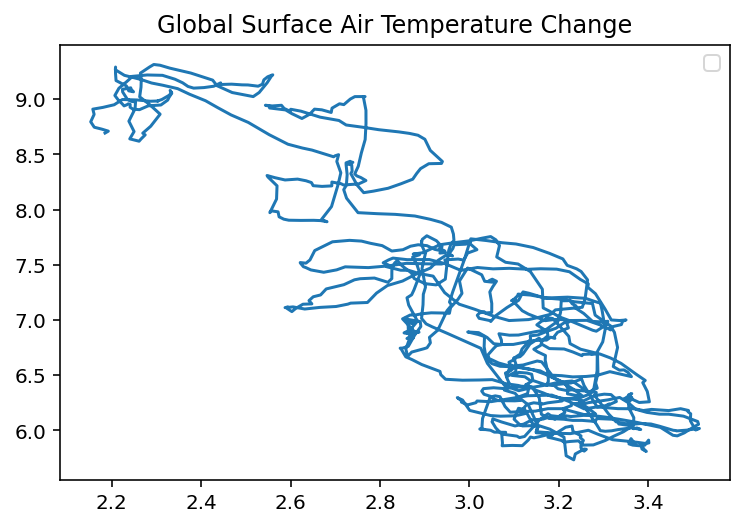

In [ ]:
y=ta_timeseries.rolling(time=12).mean()-ta_timeseries[0]
x=ds_siarean1.siarean.rolling(time=12).mean()
# a=x.to_dataset()
# b=a.to_array()

# b
x1=[]
for j in x : 
  x1.append(j[0][0])
x1
plt.plot(y,x1)
plt.legend()
plt.title('Global Surface Air Temperature Change')